<a href="https://colab.research.google.com/github/ThrishanthK-13/Fruit-Price-Prediction-/blob/main/ReverseEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras opencv-python numpy pandas pillow


In [ ]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git
data_dir = "/content/Fruit-Images-Dataset/Training"


Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385861, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 385861 (delta 0), reused 0 (delta 0), pack-reused 385858 (from 1)
Receiving objects: 100% (385861/385861), 2.10 GiB | 29.67 MiB/s, done.
Resolving deltas: 100% (1202/1202), done.
Updating files: 100% (90503/90503), done.


In [ ]:
# --- After Block 4 ---
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_gen.flow_from_directory(
    data_dir, target_size=(100,100), batch_size=32,
    class_mode='categorical', subset='training'
)
val_data = train_gen.flow_from_directory(
    data_dir, target_size=(100,100), batch_size=32,
    class_mode='categorical', subset='validation'
)

# --- Map indices back to fruit names ---
idx_to_class = {v: k for k, v in train_data.class_indices.items()}
print("Class mapping:", idx_to_class)


Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.
Class mapping: {0: 'Apple Braeburn', 1: 'Apple Crimson Snow', 2: 'Apple Golden 1', 3: 'Apple Golden 2', 4: 'Apple Golden 3', 5: 'Apple Granny Smith', 6: 'Apple Pink Lady', 7: 'Apple Red 1', 8: 'Apple Red 2', 9: 'Apple Red 3', 10: 'Apple Red Delicious', 11: 'Apple Red Yellow 1', 12: 'Apple Red Yellow 2', 13: 'Apricot', 14: 'Avocado', 15: 'Avocado ripe', 16: 'Banana', 17: 'Banana Lady Finger', 18: 'Banana Red', 19: 'Beetroot', 20: 'Blueberry', 21: 'Cactus fruit', 22: 'Cantaloupe 1', 23: 'Cantaloupe 2', 24: 'Carambula', 25: 'Cauliflower', 26: 'Cherry 1', 27: 'Cherry 2', 28: 'Cherry Rainier', 29: 'Cherry Wax Black', 30: 'Cherry Wax Red', 31: 'Cherry Wax Yellow', 32: 'Chestnut', 33: 'Clementine', 34: 'Cocos', 35: 'Corn', 36: 'Corn Husk', 37: 'Cucumber Ripe', 38: 'Cucumber Ripe 2', 39: 'Dates', 40: 'Eggplant', 41: 'Fig', 42: 'Ginger Root', 43: 'Granadilla', 44: 'Grape Blue', 45: 'Grape Pink', 46: 'Grape

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, validation_data=val_data, epochs=3)
model.save("fruit_model.h5")


Epoch 1/3
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 926s 546ms/step - accuracy: 0.7314 - loss: 1.1706 - val_accuracy: 0.9108 - val_loss: 0.4513
Epoch 2/3
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 910s 537ms/step - accuracy: 0.9903 - loss: 0.0357 - val_accuracy: 0.9343 - val_loss: 0.3560
Epoch 3/3
1694/1694 ━━━━━━━━━━━━━━━━━━━━ 906s 535ms/step - accuracy: 0.9931 - loss: 0.0250 - val_accuracy: 0.9345 - val_loss: 0.3516


In [ ]:
import cv2
import numpy as np
from google.colab import files

# Step 8: Upload an image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Read and preprocess
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
edges = cv2.Canny(blur, 50, 150)

# Find largest contour (the fruit)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    c = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(c)
    print(f"Estimated object area: {area:.0f} pixels²")
else:
    area = 0
    print("No clear object found.")


Saving orange.jpg to orange (1).jpg
Estimated object area: 54 pixels²


In [ ]:
# Step 9: Simple ripeness detection
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
avg_val = np.mean(v)

if avg_val < 80:
    ripeness = "unripe"
elif avg_val < 160:
    ripeness = "ripe"
else:
    ripeness = "overripe"

print(f"🟢 Ripeness detected: {ripeness}")


🟢 Ripeness detected: ripe


In [ ]:
#Estimate Price Based on Ripeness & Approximate Fruit
import cv2
import numpy as np

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
edges = cv2.Canny(blur, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    c = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(c)
else:
    area = img_rgb.shape[0] * img_rgb.shape[1]

# --- Ripeness detection ---
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
avg_val = np.mean(v)

if avg_val < 80:
    ripeness = "unripe"
elif avg_val < 160:
    ripeness = "ripe"
else:
    ripeness = "overripe"

# --- Approximate fruit detection for price using HSV ---
avg_h = np.mean(h)
avg_s = np.mean(s)
avg_v = np.mean(v)

# Default base price (fallback)
base_price = 60

# HSV-based approximate fruit color ranges
if 0 <= avg_h <= 10 and avg_s > 100:
    base_price = 120 if avg_v > 100 else 50
elif 20 <= avg_h <= 35 and avg_s > 100:
    base_price = 40
elif 35 <= avg_h <= 85 and avg_s > 100:
    base_price = 60
elif 10 <= avg_h <= 25 and avg_s > 100:
    base_price = 80
elif 10 <= avg_h <= 25 and avg_s < 100:
    base_price = 50

# --- Size factor ---
if area > 100000:
    size_factor = 1.2    # large fruit
elif area < 40000:
    size_factor = 0.8    # small fruit
else:
    size_factor = 1.0    # medium/normal

# --- Ripeness factor ---
if ripeness == "unripe":
    ripeness_factor = 0.9
elif ripeness == "ripe":
    ripeness_factor = 2.5
else:  # overripe
    ripeness_factor = 0.7

# --- Final estimated price ---
estimated_price = base_price * size_factor * ripeness_factor

# --- Display final summary ---
print("\nFinal Price Estimate:")
print(f" Size (area): {area:.0f} px²")
print(f" Ripeness: {ripeness}")
print(f" Estimated Price: ₹{estimated_price:.2f} per kg")



Final Price Estimate:
 Size (area): 54 px²
 Ripeness: ripe
 Estimated Price: ₹120.00 per kg


In [ ]:
# Dummy fallback values (only used if not already defined)
try:
    area
except NameError:
    area = 95000  # Example area in pixels²

try:
    ripeness
except NameError:
    ripeness = "ripe"  # Can be "unripe", "ripe", or "overripe"


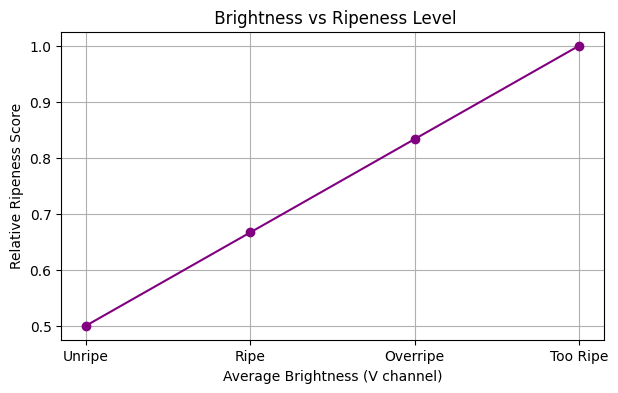

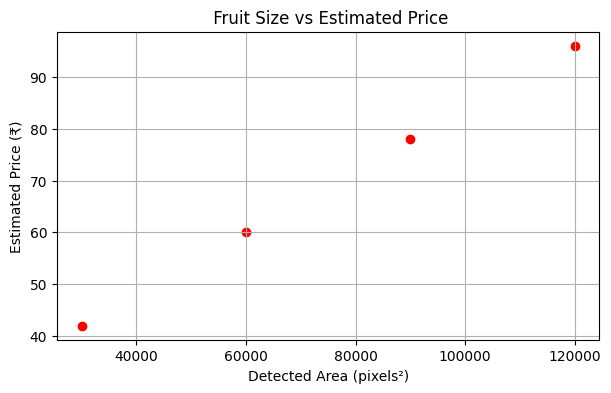

In [ ]:
# Fallback definitions
try:
    area
except NameError:
    area = 95000

try:
    ripeness
except NameError:
    ripeness = "ripe"

import matplotlib.pyplot as plt
import numpy as np

# Example values
base_price = 60
size_factor = 1.2 if area > 100000 else 0.8
ripeness_factor = 1.0 if ripeness == "ripe" else (0.9 if ripeness == "unripe" else 0.7)
estimated_price = base_price * size_factor * ripeness_factor

# Visualization 1: Brightness vs Ripeness
brightness_levels = [50, 100, 150, 200]
ripeness_labels = ['Unripe', 'Ripe', 'Overripe', 'Too Ripe']

plt.figure(figsize=(7,4))
plt.plot(brightness_levels, np.linspace(0.5, 1, len(brightness_levels)), marker='o', color='purple')
plt.title(' Brightness vs Ripeness Level')
plt.xlabel('Average Brightness (V channel)')
plt.ylabel('Relative Ripeness Score')
plt.xticks(brightness_levels, ripeness_labels)
plt.grid(True)
plt.show()

# Visualization 2: Size vs Price
sizes = [30000, 60000, 90000, 120000]
prices = [base_price * (1 + (s-60000)/100000) for s in sizes]

plt.figure(figsize=(7,4))
plt.scatter(sizes, prices, color='red')
plt.title(' Fruit Size vs Estimated Price')
plt.xlabel('Detected Area (pixels²)')
plt.ylabel('Estimated Price (₹)')
plt.grid(True)
plt.show()
